Look at residential PV trends in recent (and non-recent) history.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('../data/pv-installations.csv')
df2 = pd.read_csv('../data/pv-installations2.csv')

/var/folders/98/3v8mzvcj0ql5xvlgz1n535j80000gp/T/ipykernel_82859/2097157168.py:1: DtypeWarning: Columns (1,2,3,14,15,17,19,27,28,30,31,33,34,37,38,39,52,53,55,56,58,59,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('../data/pv-installations.csv')
/var/folders/98/3v8mzvcj0ql5xvlgz1n535j80000gp/T/ipykernel_82859/2097157168.py:2: DtypeWarning: Columns (1,2,3,14,30,31,33,34,38,39,52,53,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('../data/pv-installations2.csv')


In [3]:
df1.columns = df2.columns

In [66]:
df = pd.concat([df1, df2])

In [5]:
df.head()

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,...,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,dateOfBatteryInstall,battery_manufacturer,battery_model,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,Arizona Public Service,-1,1,-1,30-Dec-2011,18000.000,-1.0,-1.0,NON-RES,0,...,500.000,-1.0,-1.0,0,-1.0,-1,-1,-1,-1.0,-1.0
1,Arizona Public Service,-1,2,-1,22-Dec-1995,-1.000,-1.0,-1.0,RES,0,...,1400.000,-1.0,-1.0,0,-1.0,-1,-1,-1,-1.0,-1.0
2,Arizona Public Service,-1,3,-1,24-Jan-2000,12.025,-1.0,-1.0,RES,0,...,0.240,-1.0,-1.0,0,-1.0,-1,-1,-1,-1.0,-1.0
3,Arizona Public Service,-1,4,-1,02-Feb-2000,-1.000,-1.0,-1.0,RES,0,...,1400.000,-1.0,-1.0,0,-1.0,-1,-1,-1,-1.0,-1.0
4,Arizona Public Service,-1,5,-1,06-Mar-2000,8.640,-1.0,-1.0,RES,0,...,7.616,-1.0,-1.0,1,-1.0,-1,-1,-1,-1.0,-1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2041551 entries, 0 to 1041550
Data columns (total 81 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   data_provider_1                  object 
 1   data_provider_2                  object 
 2   system_ID_1                      object 
 3   system_ID_2                      object 
 4   installation_date                object 
 5   system_size_DC                   float64
 6   total_installed_price            float64
 7   rebate_or_grant                  float64
 8   customer_segment                 object 
 9   expansion_system                 int64  
 10  multiple_phase_system            int64  
 11  new_construction                 int64  
 12  tracking                         int64  
 13  ground_mounted                   int64  
 14  zip_code                         object 
 15  city                             object 
 16  state                            object 
 17  utility_

In [67]:
df['installation_date'] = pd.to_datetime(df['installation_date'], errors='coerce')

In [68]:
df = df.reset_index(drop=True)

In [69]:
df['installation_year'] = df['installation_date'].dt.year
df['installation_month'] = df['installation_date'].dt.month

In [70]:
df.isna().sum()

data_provider_1                   0
data_provider_2                   0
system_ID_1                       0
system_ID_2                       0
installation_date             17741
                              ...  
battery_model                     0
battery_rated_capacity_kW         0
battery_rated_capacity_kWh        0
installation_year             17741
installation_month            17741
Length: 83, dtype: int64

In [71]:
df.loc[df['customer_segment'] == 'RES']

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,...,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,dateOfBatteryInstall,battery_manufacturer,battery_model,battery_rated_capacity_kW,battery_rated_capacity_kWh,installation_year,installation_month
1,Arizona Public Service,-1,2,-1,1995-12-22,-1.000,-1.0,-1.0,RES,0,...,-1.0,0,-1.0,-1,-1,-1,-1.0,-1.0,1995.0,12.0
2,Arizona Public Service,-1,3,-1,2000-01-24,12.025,-1.0,-1.0,RES,0,...,-1.0,0,-1.0,-1,-1,-1,-1.0,-1.0,2000.0,1.0
3,Arizona Public Service,-1,4,-1,2000-02-02,-1.000,-1.0,-1.0,RES,0,...,-1.0,0,-1.0,-1,-1,-1,-1.0,-1.0,2000.0,2.0
4,Arizona Public Service,-1,5,-1,2000-03-06,8.640,-1.0,-1.0,RES,0,...,-1.0,1,-1.0,-1,-1,-1,-1.0,-1.0,2000.0,3.0
5,Arizona Public Service,-1,6,-1,2001-09-19,-1.000,-1.0,-1.0,RES,0,...,-1.0,0,-1.0,-1,-1,-1,-1.0,-1.0,2001.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041546,Wisconsin Focus on Energy,-1,1142705,-1,2020-12-16,7.680,34452.0,500.0,RES,0,...,-1.0,-1,-1.0,-1,-1,-1,-1.0,-1.0,2020.0,12.0
2041547,Wisconsin Focus on Energy,-1,1142771,-1,2020-12-16,9.920,43152.0,500.0,RES,0,...,-1.0,-1,-1.0,-1,-1,-1,-1.0,-1.0,2020.0,12.0
2041548,Wisconsin Focus on Energy,-1,1143039,-1,2020-12-17,6.820,25583.0,500.0,RES,0,...,-1.0,-1,-1.0,-1,-1,-1,-1.0,-1.0,2020.0,12.0
2041549,Wisconsin Focus on Energy,-1,1142708,-1,2020-12-17,15.410,70909.0,1000.0,RES,0,...,-1.0,-1,-1.0,-1,-1,-1,-1.0,-1.0,2020.0,12.0


In [72]:
df['installation_year']

0          2011.0
1          1995.0
2          2000.0
3          2000.0
4          2000.0
            ...  
2041546    2020.0
2041547    2020.0
2041548    2020.0
2041549    2020.0
2041550    2020.0
Name: installation_year, Length: 2041551, dtype: float64

In [73]:
error_years = [1900.0, 1902.0, 2029.0, 2038.0, 2106.0]
df.loc[df['installation_year'].isin(error_years), 'installation_date'] = np.nan
df.loc[df['installation_year'].isin(error_years), 'installation_year'] = np.nan

In [74]:
df.shape

(2041551, 83)

In [75]:
df['installation_date'].max()

Timestamp('2021-12-29 00:00:00')

In [76]:
plt.style.use('fivethirtyeight')

<AxesSubplot:xlabel='installation_date'>

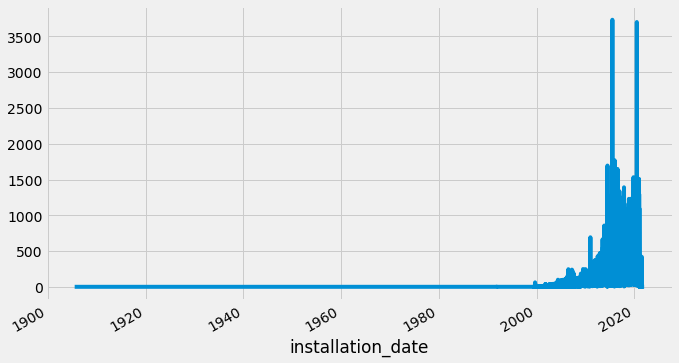

In [77]:
df.groupby('installation_date').count()['data_provider_1'].plot(figsize=(10,6))

In [81]:
df.loc[df['installation_year'] == 1905, 'installation_date'] = np.nan
df.loc[df['installation_year'] == 1905, 'installation_year'] = np.nan

<AxesSubplot:xlabel='installation_date'>

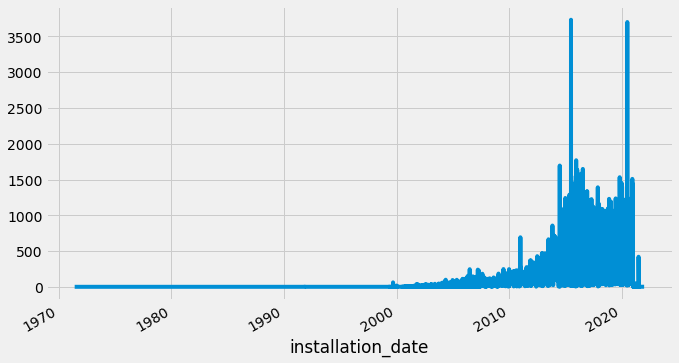

In [82]:
df.groupby('installation_date').count()['data_provider_1'].plot(figsize=(10,6))

<AxesSubplot:xlabel='installation_date'>

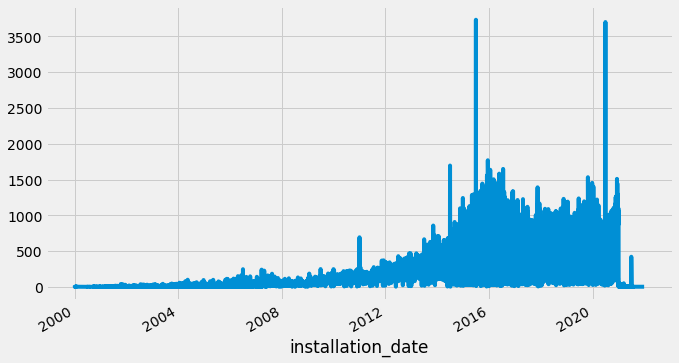

In [83]:
df.loc[df['installation_year'] >= 2000].groupby('installation_date').count()['data_provider_1'].plot(figsize=(10,6))

In [84]:
recent_df = df.loc[df['installation_year'] >= 2000]

<AxesSubplot:xlabel='installation_year'>

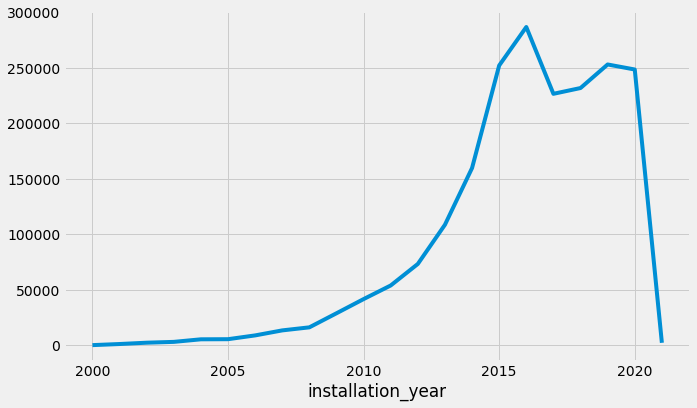

In [85]:
recent_df.groupby('installation_year').count()['data_provider_1'].plot(figsize=(10, 6))

<AxesSubplot:xlabel='installation_date'>

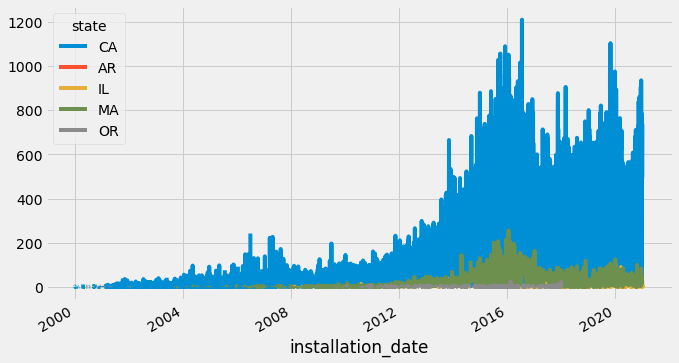

In [89]:
pd.pivot_table(data=recent_df, index='installation_date', columns='state', values='data_provider_1', aggfunc='count').loc[:, ['CA', 'AR', 'IL', 'MA', 'OR']].plot(figsize=(10,6))

In [109]:
df['installer_name'].value_counts(normalize=True)

Tesla Energy                1.505213e-01
Vivint Solar                6.771175e-02
Sunrun Inc.                 4.418161e-02
redacted                    4.042123e-02
-1                          3.242829e-02
                                ...     
Genbright                   4.898237e-07
Sixtwentyone                4.898237e-07
Gilbane Building Company    4.898237e-07
Rossi Electric              4.898237e-07
Ws Electric Inc             4.898237e-07
Name: installer_name, Length: 14284, dtype: float64

In [112]:
df.columns

Index(['data_provider_1', 'data_provider_2', 'system_ID_1', 'system_ID_2',
       'installation_date', 'system_size_DC', 'total_installed_price',
       'rebate_or_grant', 'customer_segment', 'expansion_system',
       'multiple_phase_system', 'new_construction', 'tracking',
       'ground_mounted', 'zip_code', 'city', 'state',
       'utility_service_territory', 'third_party_owned', 'installer_name',
       'self_installed', 'azimuth_1', 'azimuth_2', 'azimuth_3', 'tilt_1',
       'tilt_2', 'tilt_3', 'module_manufacturer_1', 'module_model_1',
       'module_quantity_1', 'module_manufacturer_2', 'module_model_2',
       'module_quantity_2', 'module_manufacturer_3', 'module_model_3',
       'module_quantity_3', 'additional_modules', 'technology_module_1',
       'technology_module_2', 'technology_module_3', 'BIPV_module_1',
       'BIPV_module_2', 'BIPV_module_3', 'bifacial_module_1',
       'bifacial_module_2', 'bifacial_module_3', 'nameplate_capacity_module_1',
       'nameplate_capaci

In [123]:
recent_df['utility_service_territory'].value_counts()

Pacific Gas and Electric         548853
Southern California Edison       387574
San Diego Gas and Electric       204984
Arizona Public Service           117960
National Grid                     65906
                                  ...  
CLAY COUNTY CORP                      1
LAKE WORTH UTILITUES                  1
CLAY ELECTRIC COOPERATIVE INC         1
WINTER PARK UTILITY                   1
Algoma Utility Commission - 5         1
Name: utility_service_territory, Length: 669, dtype: int64

In [132]:
recent_df.loc[recent_df['utility_service_territory'] == 'National Grid']

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,...,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,dateOfBatteryInstall,battery_manufacturer,battery_model,battery_rated_capacity_kW,battery_rated_capacity_kWh,installation_year,installation_month
341757,New York State Energy Research and Development...,-1,37879-1,-1,2017-01-24,2801.16,6032900.0,546313.42,NON-RES,0,...,-1.0,-1,-1.000000,-1,-1,-1,-1.0,-1.0,2017.0,1.0
341758,New York State Energy Research and Development...,-1,31302-1,-1,2013-12-30,689.00,1695000.0,657281.20,NON-RES,0,...,-1.0,-1,-1.000000,-1,-1,-1,-1.0,-1.0,2013.0,12.0
341771,New York State Energy Research and Development...,-1,63652,-1,2016-10-31,3.25,15112.5,1001.00,RES,0,...,-1.0,0,0.855263,-1,-1,-1,-1.0,-1.0,2016.0,10.0
341823,New York State Energy Research and Development...,-1,47566,-1,2016-08-15,2.08,9672.0,832.00,RES,0,...,-1.0,0,-1.000000,-1,-1,-1,-1.0,-1.0,2016.0,8.0
341834,New York State Energy Research and Development...,-1,2646,-1,2011-09-27,40.04,-1.0,-1.00,NON-RES,0,...,-1.0,0,1.144000,-1,-1,-1,-1.0,-1.0,2011.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802530,Massachusetts Clean Energy Center,Massachusetts Department of Energy Resources,NFG-SR25630-097356,-1,2019-05-31,352.80,1058125.0,0.00,SCHOOL,1,...,-1.0,0,1.470000,-1,-1,-1,-1.0,-1.0,2019.0,5.0
802531,Massachusetts Clean Energy Center,Massachusetts Department of Energy Resources,NFG-SR25630-097357,-1,2019-07-09,296.00,760806.0,0.00,COM,1,...,-1.0,0,1.391304,-1,-1,-1,-1.0,-1.0,2019.0,7.0
802536,Massachusetts Clean Energy Center,Massachusetts Department of Energy Resources,NFG-SR25630-099585,-1,2019-06-14,408.24,1114579.4,0.00,COM,0,...,-1.0,0,0.983455,-1,-1,-1,-1.0,-1.0,2019.0,6.0
802537,Massachusetts Clean Energy Center,Massachusetts Department of Energy Resources,NFG-SR25630-099586,-1,2019-09-23,120.60,372654.0,0.00,COM,0,...,-1.0,0,1.230612,-1,-1,-1,-1.0,-1.0,2019.0,9.0


In [133]:
recent_df['customer_segment'].value_counts(normalize=True)

RES           0.955699
COM           0.018419
-1            0.011658
NON-RES       0.007734
GOV           0.002718
NON-PROFIT    0.002001
SCHOOL        0.001773
Name: customer_segment, dtype: float64

#### WHAT IS "NATIONAL GRID"?

<AxesSubplot:xlabel='installation_year,installation_month'>

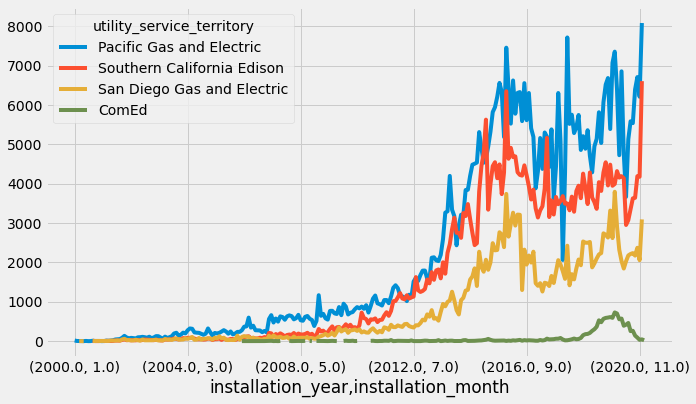

In [129]:
pd.pivot_table(data=recent_df, index=['installation_year', 'installation_month'], columns='utility_service_territory', values='data_provider_1', aggfunc='count').loc[:, ['Pacific Gas and Electric', 'Southern California Edison', 'San Diego Gas and Electric', 'ComEd']].plot(figsize=(10,6))

<AxesSubplot:xlabel='installation_year'>

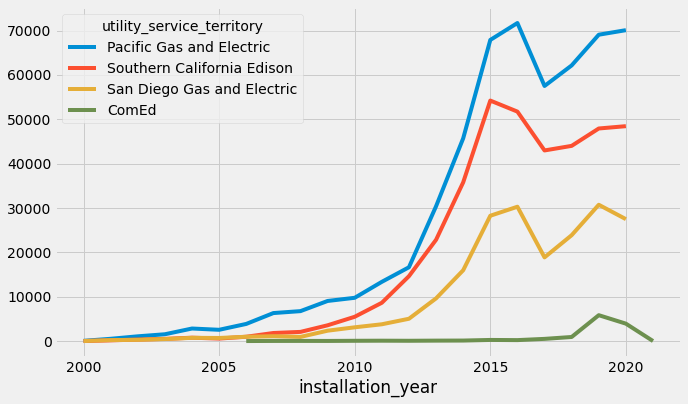

In [130]:
pd.pivot_table(data=recent_df, index=['installation_year'], columns='utility_service_territory', values='data_provider_1', aggfunc='count').loc[:, ['Pacific Gas and Electric', 'Southern California Edison', 'San Diego Gas and Electric', 'ComEd']].plot(figsize=(10,6))

<AxesSubplot:xlabel='installation_month'>

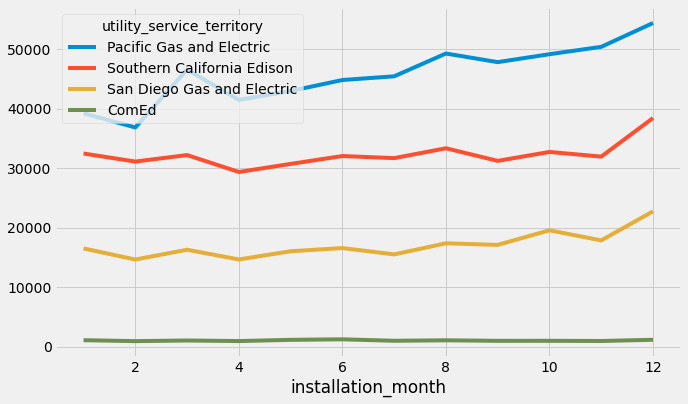

In [131]:
pd.pivot_table(data=recent_df, index=['installation_month'], columns='utility_service_territory', values='data_provider_1', aggfunc='count').loc[:, ['Pacific Gas and Electric', 'Southern California Edison', 'San Diego Gas and Electric', 'ComEd']].plot(figsize=(10,6))

<AxesSubplot:xlabel='installation_year,installation_month'>

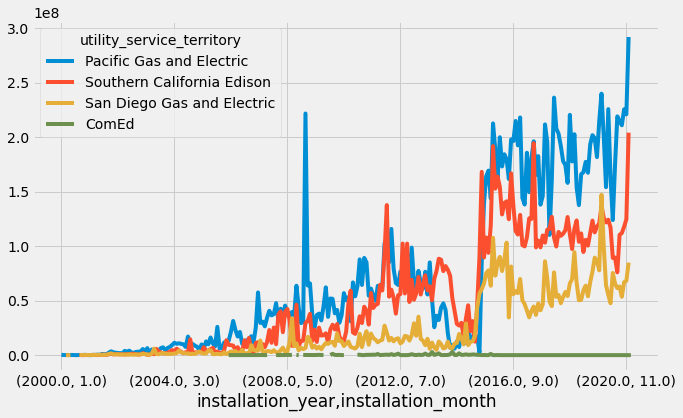

In [138]:
pd.pivot_table(data=recent_df, index=['installation_year', 'installation_month'], columns='utility_service_territory', values='total_installed_price', aggfunc='median').loc[:, ['Pacific Gas and Electric', 'Southern California Edison', 'San Diego Gas and Electric', 'ComEd']].plot(figsize=(10,6))

<AxesSubplot:xlabel='installation_year,installation_month'>

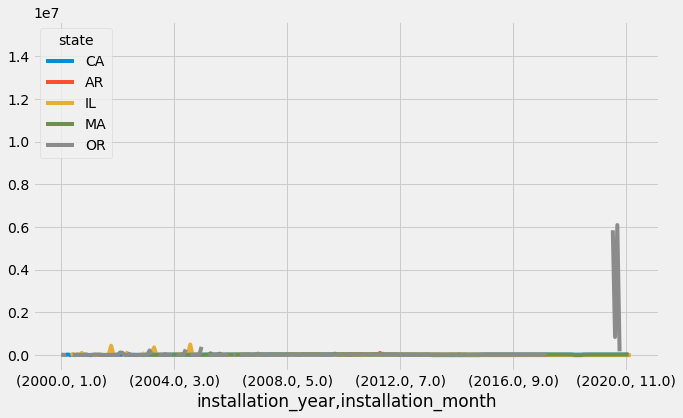

In [143]:
pd.pivot_table(data=recent_df, index=['installation_year', 'installation_month'], columns='state', values='total_installed_price', aggfunc='median').loc[:, ['CA', 'AR', 'IL', 'MA', 'OR']].plot(figsize=(10,6))

In [148]:
recent_df.loc[recent_df['state'] == 'OR']['total_installed_price'].describe()

count    3.907000e+03
mean     4.962316e+04
std      4.820320e+05
min     -1.000000e+00
25%      1.450000e+04
50%      1.967292e+04
75%      3.016440e+04
max      2.000000e+07
Name: total_installed_price, dtype: float64